In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_data = pd.read_csv('train.csv')
test_data  = pd.read_csv('test.csv')

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
data = [train_data,test_data]
for dataset in data:
    dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

In [7]:
data1=[train_data,test_data]
for dataset in data1:
    total= dataset.isnull().sum()
    percent = (dataset.isnull().sum()/dataset.isnull().count()*100)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms= ms[ms["Percent"] > 0]
    print(ms,'\n')


          Total    Percent
Age         177  19.865320
Cabin       687  77.104377
Embarked      2   0.224467 

       Total    Percent
Age       86  20.574163
Fare       1   0.239234
Cabin    327  78.229665 



In [8]:
start = ', '
end = '. '
desig=[]
for dataset in data1:
    desig=[]
    for s in dataset.Name:
        desig.append(s[s.find(start)+len(start):s.find(end)])
    desig=np.array(desig)
    dataset.Name=desig
train_data.Name.head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Name, dtype: object

In [9]:
data=pd.concat([train_data.drop(columns=['Survived']),test_data])
data.groupby(["Name"]).agg({'Age':'median'})

,Age
Name,
Capt,70.0
Col,54.5
Don,40.0
Dona,39.0
Dr,49.0
Jonkheer,38.0
Lady,48.0
Major,48.5
Master,4.0


In [10]:
# filling up Nan values as per respective Name's median
mapping=data["Name"].map(data.groupby(["Name"]).Age.median())
train_data.Age.fillna(value=mapping[0:len(train_data)],inplace=True)
test_data.Age.fillna(value=mapping[len(train_data):],inplace=True)
data1=[train_data,test_data]

In [11]:
test_data.Fare.fillna(value=50.0,inplace=True)

In [12]:
train_data.Embarked.fillna(value='S',inplace=True)

In [13]:
train_data.groupby('Cabin').agg({'Survived':'mean'})

,Survived
Cabin,
A10,0.0
A14,0.0
A16,1.0
A19,0.0
A20,1.0
...,...
F33,1.0
F38,0.0
F4,1.0


In [14]:
mapping=train_data.groupby(['Cabin']).Survived.mean().astype(int)
for dataset in data1:
    dataset.Cabin=dataset.Cabin.map(mapping)
    dataset.Cabin.fillna(value=2,inplace=True)

In [15]:
print('train_data')
print(train_data.isnull().sum())
print('\ntest_data')
print(test_data.isnull().sum())

train_data
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

test_data
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [16]:
dicty = {'male':0,'female':1}
train_data["Sex"]=train_data['Sex'].map( dicty )
test_data["Sex"]=test_data['Sex'].map( dicty )
dicty = {}
for count,obj in enumerate(set((train_data.Embarked))):
    dicty[obj] = count
train_data.Embarked = train_data.Embarked.map( dicty )
test_data.Embarked = test_data.Embarked.map( dicty )
train_data = pd.concat([ train_data , pd.get_dummies( train_data.Pclass ,prefix='P')  ],axis=1)
test_data = pd.concat([ test_data , pd.get_dummies( test_data.Pclass , prefix='P' )  ],axis=1)

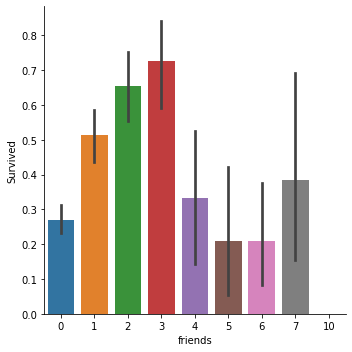

In [18]:
mapping = data.groupby(['Ticket']).Ticket.count()
train_data['friends']=train_data['Ticket'].map(mapping)-1
test_data['friends']=test_data.Ticket.map(mapping)-1
sns.catplot(x=("friends"), y=("Survived"), kind="bar", data=train_data)
plt.savefig("fig1.png")

In [19]:
data1=[train_data,test_data]
def isalone(x):
    if(x>0):
        return 0
    else:
        return 1
for dataset in data1:
    dataset['alone']=dataset.Parch+dataset.SibSp+dataset.friends
    dataset.alone=dataset.alone.apply(isalone)

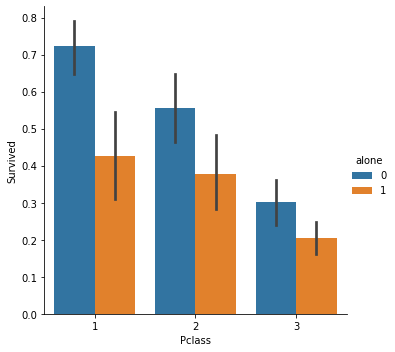

In [21]:
import seaborn as sns
sns.catplot(x=("Pclass"), y=("Survived"), hue="alone", kind="bar", data=train_data)
plt.savefig("fig2.png")

In [22]:
# binning Age
for dataset in data1:
    dataset.loc[dataset['Age'] <= 18, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 35), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 35) & (dataset['Age'] <= 64), 'Age'] = 2
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 3
# binning Fare
for dataset in data1:
    dataset['Fare_Binned'] = pd.qcut(dataset['Fare'], 3, labels=[0, 1, 2])
    dataset.drop(['Fare'], inplace=True, axis=1)

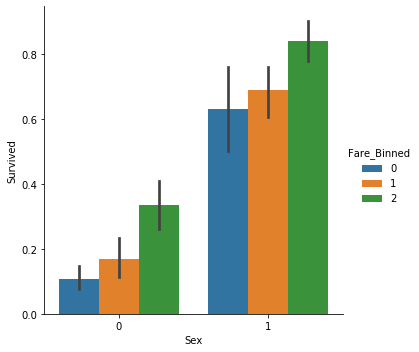

In [23]:
sns.catplot(x=("Sex"), y=("Survived"), hue="Fare_Binned", kind="bar", data=train_data)
plt.savefig("fig3.png")

In [24]:
train_data.drop(columns=['PassengerId','Pclass','Name','Ticket'],inplace=True)
test_data.drop(columns=['PassengerId','Ticket','Pclass'],inplace=True)

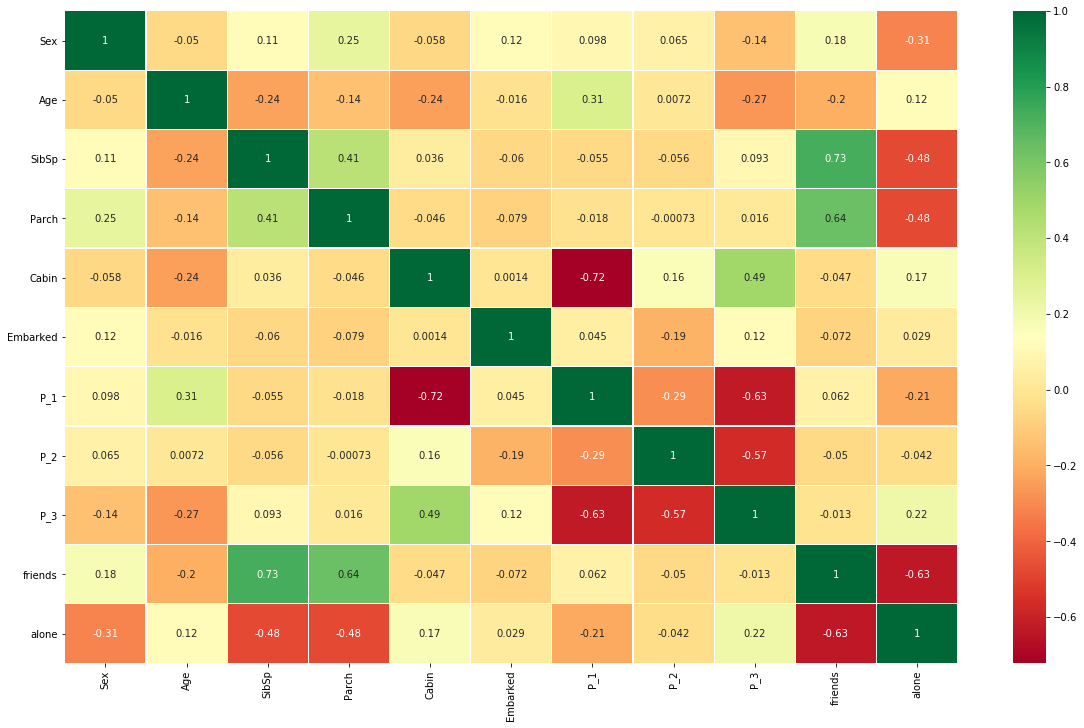

In [35]:
sns.heatmap(train_data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.savefig("corr.png")
plt.show()


In [26]:
y=train_data.Survived
train_data.drop(columns=['Survived'],inplace=True)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(train_data,y,test_size=0.3,random_state=0)
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(random_state = 3 ,warm_start=True)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print('Accuracy on training data=',clf.score(X_test,y_test)*100,'%')

Accuracy on training data= 87.31343283582089 %


In [27]:
test_data.drop(columns=['Name'],inplace=True)

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(random_state = 0 ,warm_start=True)
clf.fit(train_data, y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0, warm_start=True)

In [29]:
y_pred = clf.predict(test_data).astype(int)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [30]:
#Since I have dropped PassengerId so reading data again for PassengerId 
testt_data  = pd.read_csv('test.csv')

In [31]:
testt_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [32]:
testt_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [33]:
submission = pd.DataFrame({ 'PassengerId': testt_data.PassengerId.values, 'Survived': y_pred })

In [34]:
submission.to_csv("vivek-titanic.csv", index=False)